<a href="https://colab.research.google.com/github/arisha-ui/Supplychain-Optimization/blob/main/DBMS_PROJECT_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import json

In [ ]:
client=pymongo.MongoClient("mongodb://localhost:27017")

In [ ]:
df=pd.read_csv("supply_chain_data (1).csv")

In [ ]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
Customer_Segment_by_Products= df.groupby(["Customer demographics","Product type"])["SKU"].count().reset_index()
Customer_Segment_by_Products

,Customer demographics,Product type,SKU
0,Female,cosmetics,10
1,Female,haircare,2
2,Female,skincare,13
3,Male,cosmetics,4
4,Male,haircare,10
5,Male,skincare,7
6,Non-binary,cosmetics,5
7,Non-binary,haircare,7
8,Non-binary,skincare,11
9,Unknown,cosmetics,7


In [ ]:
Routes_by_Transportation= df.groupby(["Routes","Transportation modes"])["SKU"].count().reset_index()
Routes_by_Transportation

,Routes,Transportation modes,SKU
0,Route A,Air,11
1,Route A,Rail,14
2,Route A,Road,11
3,Route A,Sea,7
4,Route B,Air,7
5,Route B,Rail,11
6,Route B,Road,13
7,Route B,Sea,6
8,Route C,Air,8
9,Route C,Rail,3


In [ ]:
data=df.to_dict(orient="records")

In [ ]:
data

[{'Product type': 'haircare',
  'SKU': 'SKU0',
  'Price': 69.80800554211577,
  'Availability': 55,
  'Number of products sold': 802,
  'Revenue generated': 8661.996792392383,
  'Customer demographics': 'Non-binary',
  'Stock levels': 58,
  'Lead times': 7,
  'Order quantities': 96,
  'Shipping times': 4,
  'Shipping carriers': 'Carrier B',
  'Shipping costs': 2.956572139430807,
  'Supplier name': 'Supplier 3',
  'Location': 'Mumbai',
  'Lead time': 29,
  'Production volumes': 215,
  'Manufacturing lead time': 29,
  'Manufacturing costs': 46.27987924050832,
  'Inspection results': 'Pending',
  'Defect rates': 0.2264103608499251,
  'Transportation modes': 'Road',
  'Routes': 'Route B',
  'Costs': 187.75207545920392},
 {'Product type': 'skincare',
  'SKU': 'SKU1',
  'Price': 14.84352327508434,
  'Availability': 95,
  'Number of products sold': 736,
  'Revenue generated': 7460.900065445849,
  'Customer demographics': 'Female',
  'Stock levels': 53,
  'Lead times': 30,
  'Order quantities':

In [ ]:
db=client["DBMS"]

In [ ]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'DBMS')


In [ ]:
db.supplychaindata.insert_many(data)

In [ ]:
1# Find the total renevue generated by product type
pipeline = [
    {
        "$group": {
            "_id": "$Product type",
            "Revenue generated": { "$sum": "$Revenue generated" }
        }
    }
]

result = db.supplychaindata.aggregate(pipeline)



In [ ]:
print(result)

In [ ]:
list_cursor=list(result)

In [ ]:
list_cursor

[{'_id': 'cosmetics', 'Revenue generated': 807606.3299974157},
 {'_id': 'skincare', 'Revenue generated': 1208140.8106653162},
 {'_id': 'haircare', 'Revenue generated': 872276.9530273116}]

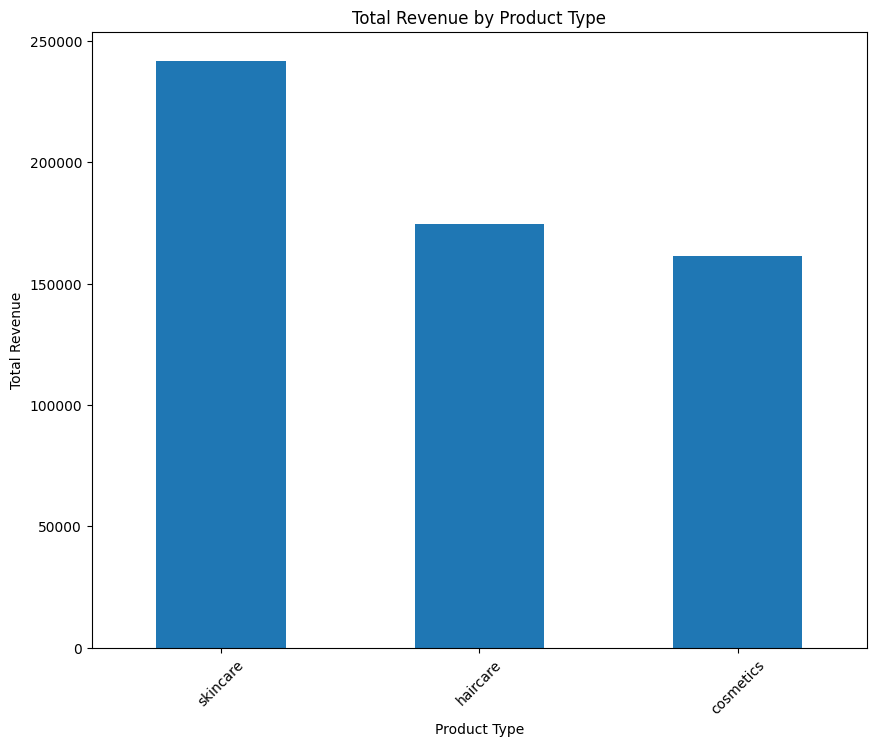

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Product type' and calculate the sum of 'Revenue generated'
revenue_by_product_type = df.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)

# Create a bar chart
revenue_by_product_type.plot(kind='bar', figsize=(10, 8))
plt.title("Total Revenue by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#2 Find the products with the highest total stock levels
result = db.supplychaindata.find().sort("stock_levels", -1)

In [ ]:
print(result)

In [ ]:
list_cursor=list(result)

In [ ]:
list_cursor

[{'_id': ObjectId('653d10d4f4b2bba3344571ed'),
  'Product type': 'haircare',
  'SKU': 'SKU0',
  'Price': 69.80800554211577,
  'Availability': 55,
  'Number of products sold': 802,
  'Revenue generated': 8661.996792392383,
  'Customer demographics': 'Non-binary',
  'Stock levels': 58,
  'Lead times': 7,
  'Order quantities': 96,
  'Shipping times': 4,
  'Shipping carriers': 'Carrier B',
  'Shipping costs': 2.956572139430807,
  'Supplier name': 'Supplier 3',
  'Location': 'Mumbai',
  'Lead time': 29,
  'Production volumes': 215,
  'Manufacturing lead time': 29,
  'Manufacturing costs': 46.27987924050832,
  'Inspection results': 'Pending',
  'Defect rates': 0.2264103608499251,
  'Transportation modes': 'Road',
  'Routes': 'Route B',
  'Costs': 187.75207545920392},
 {'_id': ObjectId('653d10d4f4b2bba3344571ee'),
  'Product type': 'skincare',
  'SKU': 'SKU1',
  'Price': 14.84352327508434,
  'Availability': 95,
  'Number of products sold': 736,
  'Revenue generated': 7460.900065445849,
  'Cus

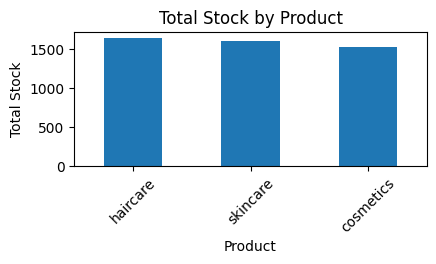

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Product'
# Group the DataFrame by 'Product' and calculate the sum of 'stock_levels'
total_stock_by_product = df.groupby('Product type')['Stock levels'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 1)
total_stock_by_product.plot(kind='bar')
plt.title("Total Stock by Product")
plt.xlabel("Product")
plt.ylabel("Total Stock")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#3 Find products with the lowest manufacturing costs
result = db.supplychaindata.find().sort("manufacturing_costs", 1)

In [ ]:
print(result)

In [ ]:
list_cursor=list(result)

In [ ]:
list_cursor

[{'_id': ObjectId('653d10d4f4b2bba3344571ed'),
  'Product type': 'haircare',
  'SKU': 'SKU0',
  'Price': 69.80800554211577,
  'Availability': 55,
  'Number of products sold': 802,
  'Revenue generated': 8661.996792392383,
  'Customer demographics': 'Non-binary',
  'Stock levels': 58,
  'Lead times': 7,
  'Order quantities': 96,
  'Shipping times': 4,
  'Shipping carriers': 'Carrier B',
  'Shipping costs': 2.956572139430807,
  'Supplier name': 'Supplier 3',
  'Location': 'Mumbai',
  'Lead time': 29,
  'Production volumes': 215,
  'Manufacturing lead time': 29,
  'Manufacturing costs': 46.27987924050832,
  'Inspection results': 'Pending',
  'Defect rates': 0.2264103608499251,
  'Transportation modes': 'Road',
  'Routes': 'Route B',
  'Costs': 187.75207545920392},
 {'_id': ObjectId('653d10d4f4b2bba3344571ee'),
  'Product type': 'skincare',
  'SKU': 'SKU1',
  'Price': 14.84352327508434,
  'Availability': 95,
  'Number of products sold': 736,
  'Revenue generated': 7460.900065445849,
  'Cus

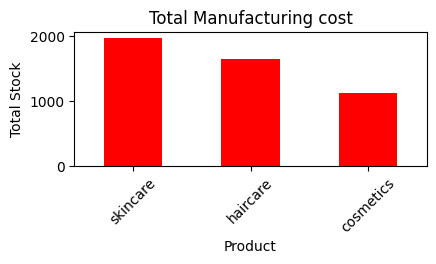

In [ ]:
import matplotlib.pyplot as plt
total_manufacturing_cost = df.groupby('Product type')['Manufacturing costs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 1)
total_stock_by_product.plot(kind='bar',color="red")
plt.title("Total Manufacturing cost")
plt.xlabel("Product")
plt.ylabel("Total Stock")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#4 Find the total availability of product by location
pipeline = [
    {
        "$group": {
            "_id": {
                "Location": "$Location",
                "Product": "$Product type"
            },
            "TotalAvailability": { "$sum": "$Availability" }
        }
    }
]

result = db.supplychaindata.aggregate(pipeline)


In [ ]:
print(result)

In [ ]:
list_cursor=list(result)

In [ ]:
list_cursor

[{'_id': {'Location': 'Delhi', 'Product': 'haircare'},
  'TotalAvailability': 770},
 {'_id': {'Location': 'Chennai', 'Product': 'haircare'},
  'TotalAvailability': 1520},
 {'_id': {'Location': 'Delhi', 'Product': 'cosmetics'},
  'TotalAvailability': 1710},
 {'_id': {'Location': 'Chennai', 'Product': 'cosmetics'},
  'TotalAvailability': 1645},
 {'_id': {'Location': 'Bangalore', 'Product': 'skincare'},
  'TotalAvailability': 1910},
 {'_id': {'Location': 'Kolkata', 'Product': 'haircare'},
  'TotalAvailability': 1250},
 {'_id': {'Location': 'Bangalore', 'Product': 'haircare'},
  'TotalAvailability': 2345},
 {'_id': {'Location': 'Bangalore', 'Product': 'cosmetics'},
  'TotalAvailability': 805},
 {'_id': {'Location': 'Kolkata', 'Product': 'cosmetics'},
  'TotalAvailability': 365},
 {'_id': {'Location': 'Kolkata', 'Product': 'skincare'},
  'TotalAvailability': 3490},
 {'_id': {'Location': 'Mumbai', 'Product': 'skincare'},
  'TotalAvailability': 1245},
 {'_id': {'Location': 'Chennai', 'Product

![](output.jpg)

In [ ]:
#5 Find products with the highest total order quantities
result = db.supplychaindata.find().sort("Order quantities ", -1).limit(10)  # Limit the results to the top 5 products


In [ ]:
print(result)

In [ ]:
list_cursor=list(result)

In [ ]:
list_cursor

[{'_id': ObjectId('653d10d4f4b2bba3344571ed'),
  'Product type': 'haircare',
  'SKU': 'SKU0',
  'Price': 69.80800554211577,
  'Availability': 55,
  'Number of products sold': 802,
  'Revenue generated': 8661.996792392383,
  'Customer demographics': 'Non-binary',
  'Stock levels': 58,
  'Lead times': 7,
  'Order quantities': 96,
  'Shipping times': 4,
  'Shipping carriers': 'Carrier B',
  'Shipping costs': 2.956572139430807,
  'Supplier name': 'Supplier 3',
  'Location': 'Mumbai',
  'Lead time': 29,
  'Production volumes': 215,
  'Manufacturing lead time': 29,
  'Manufacturing costs': 46.27987924050832,
  'Inspection results': 'Pending',
  'Defect rates': 0.2264103608499251,
  'Transportation modes': 'Road',
  'Routes': 'Route B',
  'Costs': 187.75207545920392},
 {'_id': ObjectId('653d10d4f4b2bba3344571ee'),
  'Product type': 'skincare',
  'SKU': 'SKU1',
  'Price': 14.84352327508434,
  'Availability': 95,
  'Number of products sold': 736,
  'Revenue generated': 7460.900065445849,
  'Cus

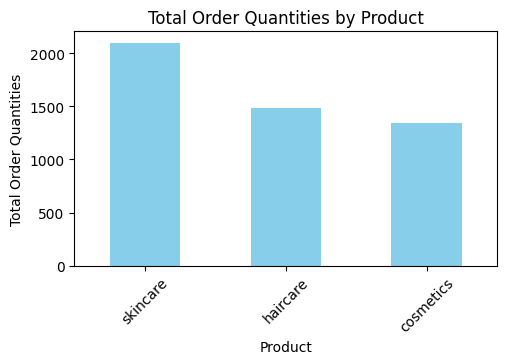

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Product'
# Group the DataFrame by 'Product' and calculate the sum of 'order_quantities'
total_order_quantities_by_product = df.groupby('Product type')['Order quantities'].sum()

# Sort the results in descending order
total_order_quantities_by_product = total_order_quantities_by_product.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 14))
plt.subplot(4, 2, 2)
total_order_quantities_by_product.plot(kind='bar', color='skyblue')
plt.title("Total Order Quantities by Product")
plt.xlabel("Product")
plt.ylabel("Total Order Quantities")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#6 Find the total revenue generated by Suppliers

pipeline = [
    {
        "$group": {
            "_id": "$Supplier name",
            "Revenue generated": { "$sum": "$Revenue generated" }
        }
    }
]

result = db.supplychaindata.aggregate(pipeline)

In [ ]:
print(result)

In [ ]:
list_cursor=list(result)

In [ ]:
list_cursor

[{'_id': 'Supplier 2', 'Revenue generated': 627337.0930265015},
 {'_id': 'Supplier 5', 'Revenue generated': 551717.3182814345},
 {'_id': 'Supplier 1', 'Revenue generated': 787644.9751972822},
 {'_id': 'Supplier 4', 'Revenue generated': 432344.8089940138},
 {'_id': 'Supplier 3', 'Revenue generated': 488979.8981908114}]

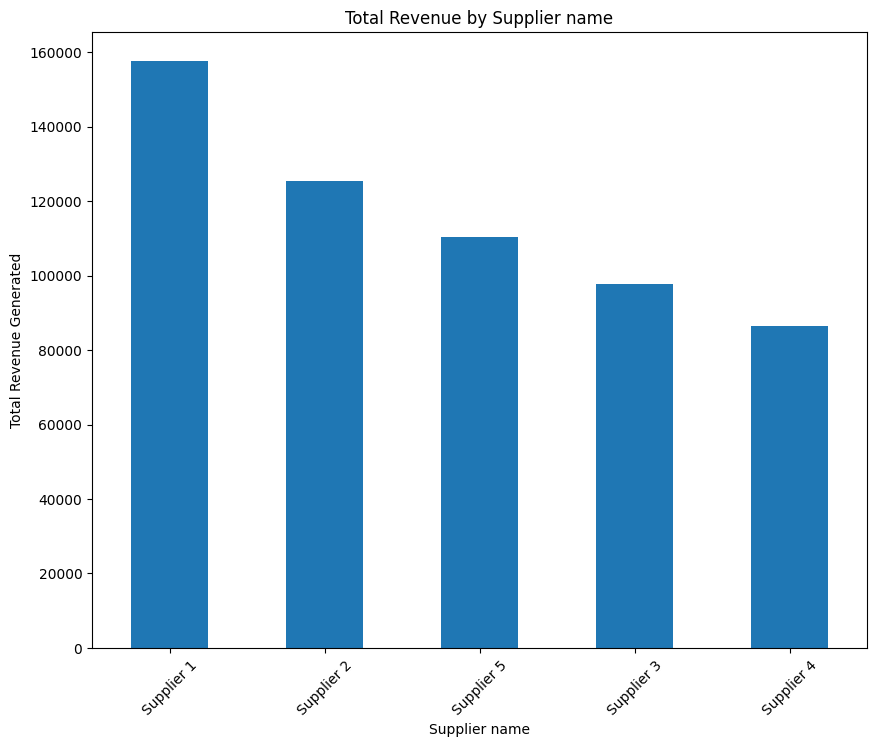

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Product type' and calculate the sum of 'Revenue generated'
revenue_by_product_type = df.groupby('Supplier name')['Revenue generated'].sum().sort_values(ascending=False)

# Create a bar chart
revenue_by_product_type.plot(kind='bar', figsize=(10, 8))
plt.title("Total Revenue by Supplier name")
plt.xlabel("Supplier name")
plt.ylabel("Total Revenue Generated")
plt.xticks(rotation=45)
plt.show()
